In [6]:
# !python3 -m pip install --upgrade 'google-cloud-bigquery[bqstorage,pandas]'

In [41]:
#  Standard library imports
from collections import Counter
#  Companion scripts 
from client_auth import create_client
# #  BigQuery import
# from google.oauth2 import service_account
# from google.cloud import bigquery
#  Data processing
import pandas as pd
pd.set_option("display.max_columns", None) 
#  Data vizualization
from matplotlib import pyplot as plt
import seaborn as sns

## Set up

### Authenticate and connect to BigQuery API.

In [43]:
def create_client():
    key_path = "/Users/Isabel/Documents/Git/iron-axon-317718-542c36710a0a.json"
    scope = "https://www.googleapis.com/auth/cloud-platform"
    credentials = service_account.Credentials.from_service_account_file(key_path, scopes=[scope],)
    #  Create an instance of the bigquery.Client class to create the client
    client = bigquery.Client(credentials=credentials, project=credentials.project_id,)
    return client

client = create_client()

### Fetch dataset

In [ ]:
#  Define dataset reference
project = "bigquery-public-data"
dataset_id = "medicare"
dataset_ref = client.dataset(dataset_id, project=project)

#  Fetch dataset via API request
dataset = client.get_dataset(dataset_ref)

## Data exploration

In [52]:
#  List all tables in the medicare dataset
tables = list(client.list_tables(dataset))

#  Display names of all tables w/i dataset
for table in tables:  
    print(table.table_id)

inpatient_charges_2011
inpatient_charges_2012
inpatient_charges_2013
inpatient_charges_2014
outpatient_charges_2011
outpatient_charges_2012
outpatient_charges_2013
outpatient_charges_2014
part_d_prescriber_2014
physicians_and_other_supplier_2012
physicians_and_other_supplier_2013
physicians_and_other_supplier_2014


In [67]:
# Construct a reference to a given table
table_ref_2014 = dataset_ref.table("part_d_prescriber_2014")

# API request - fetch the table
table_2014 = client.get_table(table_ref_2014)
table_2014.schema

[SchemaField('npi', 'INTEGER', 'REQUIRED', 'National Provider Identifier', (), None),
 SchemaField('nppes_provider_last_org_name', 'STRING', 'NULLABLE', 'Last Name/Organization Name of the Provider', (), None),
 SchemaField('nppes_provider_first_name', 'STRING', 'NULLABLE', 'First Name of the Provider', (), None),
 SchemaField('nppes_provider_city', 'STRING', 'NULLABLE', 'City of the Provider', (), None),
 SchemaField('nppes_provider_state', 'STRING', 'NULLABLE', 'State Code of the Provider', (), None),
 SchemaField('specialty_description', 'STRING', 'NULLABLE', 'Provider Specialty Type', (), None),
 SchemaField('description_flag', 'STRING', 'NULLABLE', 'Source of Provider Specialty', (), None),
 SchemaField('drug_name', 'STRING', 'REQUIRED', 'Name of the drug', (), None),
 SchemaField('generic_name', 'STRING', 'NULLABLE', 'Generic name of the drug', (), None),
 SchemaField('bene_count', 'INTEGER', 'NULLABLE', 'Number of Medicare Beneficiaries', (), None),
 SchemaField('total_claim_cou

In [68]:
client.list_rows(table_2014, max_results=5).to_dataframe()

/Users/Isabel/opt/anaconda3/lib/python3.8/site-packages/google/cloud/bigquery/table.py:1860: UserWarning: Cannot use bqstorage_client if max_results is set, reverting to fetching data with the REST endpoint.
  if not self._validate_bqstorage(bqstorage_client, create_bqstorage_client):


,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,bene_count_ge65_suppress_flag,total_claim_count_ge65,ge65_suppress_flag,total_day_supply_ge65,total_drug_cost_ge65
0,1417953134,KELLOGG,WILLIAM,POTTSVILLE,PA,Ophthalmology,S,FML,FLUOROMETHOLONE,43,81,1970,7025.69,30,,57,,1332,4954.08
1,1366428872,NIGRO,JEFF,VANDERGRIFT,PA,Podiatry,S,SSD,SILVER SULFADIAZINE,19,22,307,193.07,19,,22,,307,193.07
2,1891724027,CHEBANOVA,ELENA,DENVER,CO,Internal Medicine,S,SSD,SILVER SULFADIAZINE,12,23,690,285.08,12,,23,,690,285.08
3,1013911098,SAUNDERS,NEIL,TOLEDO,OH,Podiatry,S,SSD,SILVER SULFADIAZINE,32,39,751,373.45,21,,24,,484,220.64
4,1093796542,GREATHOUSE,MARK,PITTSBURGH,PA,Cardiology,S,AZOR,AMLODIPINE BES/OLMESARTAN MED,15,54,2970,13844.40,15,,54,,2970,13844.40


In [65]:
# Construct a reference to a given table
table_ref = dataset_ref.table("physicians_and_other_supplier_2014")

# API request - fetch the table
table = client.get_table(table_ref)
table.schema

[SchemaField('npi', 'INTEGER', 'REQUIRED', 'National Provider Identifier', (), None),
 SchemaField('nppes_provider_last_org_name', 'STRING', 'NULLABLE', 'Last Name/Organization Name of the Provider', (), None),
 SchemaField('nppes_provider_first_name', 'STRING', 'NULLABLE', 'First Name of the Provider', (), None),
 SchemaField('nppes_provider_mi', 'STRING', 'NULLABLE', 'Middle Initial of the Provider', (), None),
 SchemaField('nppes_credentials', 'STRING', 'NULLABLE', 'Credentials of the Provider', (), None),
 SchemaField('nppes_provider_gender', 'STRING', 'NULLABLE', 'Gender of the Provider', (), None),
 SchemaField('nppes_entity_code', 'STRING', 'NULLABLE', 'Entity Type of the Provider', (), None),
 SchemaField('nppes_provider_street1', 'STRING', 'NULLABLE', 'Street Address 1 of the Provider', (), None),
 SchemaField('nppes_provider_street2', 'STRING', 'NULLABLE', 'Street Address 2 of the Provider', (), None),
 SchemaField('nppes_provider_city', 'STRING', 'NULLABLE', 'City of the Pro

In [66]:
client.list_rows(table, max_results=5).to_dataframe()

/Users/Isabel/opt/anaconda3/lib/python3.8/site-packages/google/cloud/bigquery/table.py:1860: UserWarning: Cannot use bqstorage_client if max_results is set, reverting to fetching data with the REST endpoint.
  if not self._validate_bqstorage(bqstorage_client, create_bqstorage_client):


,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,nppes_provider_zip,nppes_provider_state,nppes_provider_country,provider_type,medicare_participation_indicator,place_of_service,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_medicare_allowed_amt,average_submitted_chrg_amt,average_medicare_payment_amt,average_medicare_standard_amt
0,1053378265,NEW ENGLAND EYE SURGICAL CENTER INC,,,,,O,696 MAIN ST,,WEYMOUTH,02190,MA,US,Ambulatory Surgical Center,Y,F,0191T,Internal insertion of eye fluid drainage device,N,21.0,18,21,1883.69,2500.000000,1476.81,1315.47000
1,1972532539,WILTON SURGERY CENTER LLC,,,,,O,195 DANBURY ROAD,,WILTON,068974075,CT,US,Ambulatory Surgical Center,Y,F,0191T,Internal insertion of eye fluid drainage device,N,48.0,32,48,1950.73,7745.000000,1529.37,1319.92625
2,1720182835,"LIMESTONE MEDICAL CENTER, INC",,,,,O,1941 LIMESTONE RD STE 113,,WILMINGTON,198085413,DE,US,Ambulatory Surgical Center,Y,F,0191T,Internal insertion of eye fluid drainage device,N,13.0,11,13,1727.65,2012.307692,1354.48,1315.47000
3,1487765897,BAY MICROSURGICAL UNIT,,,,,O,1200 HIGHMARKET ST,STE 100,GEORGETOWN,294403227,SC,US,Ambulatory Surgical Center,Y,F,0191T,Internal insertion of eye fluid drainage device,N,27.0,20,27,1537.71,2000.000000,1205.57,1315.47000
4,1801811773,"DUPAGE EYE SURGERY CENTER, LLC",,,,,O,2015 N MAIN ST,,WHEATON,601873152,IL,US,Ambulatory Surgical Center,Y,F,0191T,Internal insertion of eye fluid drainage device,N,18.0,14,18,1712.97,1824.000000,1342.97,1315.47000


In [58]:
# table_ref = dataset_ref.table('inpatient_charges_2011', 'inpatient_charges_2012')
# table = client.get_table(table_ref)

In [21]:
def most_common(category, N):
    print(dict(Counter(df[category].values).most_common(N)))

In [27]:
category = 'drg_definition'
N = 5
most_common(category, N)

{'194 - SIMPLE PNEUMONIA & PLEURISY W CC': 3023, '690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC': 2989, '292 - HEART FAILURE & SHOCK W CC': 2953, '392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC': 2950, '641 - MISC DISORDERS OF NUTRITION,METABOLISM,FLUIDS/ELECTROLYTES W/O MCC': 2899}


In [134]:
query = """ SELECT nppes_provider_state as state, 
                   COUNT(generic_name) as total_num_medications
                    FROM bigquery-public-data.medicare.part_d_prescriber_2014
                    WHERE (nppes_provider_state != 'AA' AND 
                                    nppes_provider_state != 'AE' AND 
                                    nppes_provider_state != 'AS' AND
                                    nppes_provider_state != 'AP' AND
                                    nppes_provider_state != 'GU' AND
                                    nppes_provider_state != 'MP' AND
                                    nppes_provider_state != 'PR' AND
                                    nppes_provider_state != 'VI' AND
                                    nppes_provider_state != 'XX' AND
                                    nppes_provider_state != 'ZZ')
                    GROUP BY 1
                    ORDER BY 1
              """

In [135]:
query_job = client.query(query)
tot_meds_per_state = query_job.to_dataframe()
print(len(tot_meds_per_state))
tot_meds_per_state.value_counts().head()

51


state  total_num_medications
AK     28790                    1
PA     1229131                  1
ND     66878                    1
NE     166949                   1
NH     103143                   1
dtype: int64

In [136]:
print(tot_meds_per_state)

   state  total_num_medications
0     AK                  28790
1     AL                 416439
2     AR                 270039
3     AZ                 422571
4     CA                2314584
5     CO                 310094
6     CT                 285161
7     DC                  40966
8     DE                  68645
9     FL                1611284
10    GA                 665139
11    HI                  79298
12    IA                 287806
13    ID                 112699
14    IL                 866586
15    IN                 536188
16    KS                 245816
17    KY                 451310
18    LA                 394543
19    MA                 557205
20    MD                 337520
21    ME                 138406
22    MI                 824255
23    MN                 401268
24    MO                 553268
25    MS                 269130
26    MT                  79668
27    NC                 876333
28    ND                  66878
29    NE                 166949
30    NH

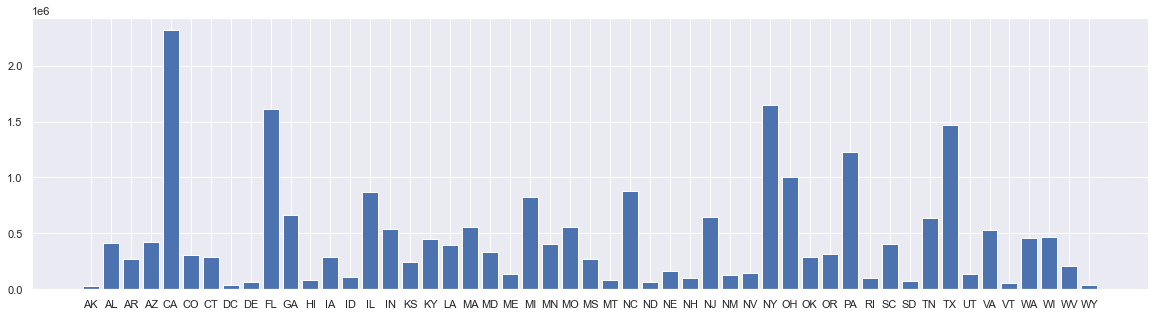

In [124]:
plt.rcParams["figure.figsize"] = (20,5)
x = tot_meds_per_state['state'].values
height  = tot_meds_per_state['total_num_medications'].values
plt.bar(x, height)
plt.show()

In [128]:
tot_meds_per_state_sorted = tot_meds_per_state.sort_values(by=['total_num_medications'], ascending=False)

In [129]:
tot_meds_per_state_sorted

,state,total_num_medications
4,CA,2314584
34,NY,1650394
9,FL,1611284
43,TX,1472280
38,PA,1229131
35,OH,1001898
27,NC,876333
14,IL,866586
22,MI,824255
10,GA,665139


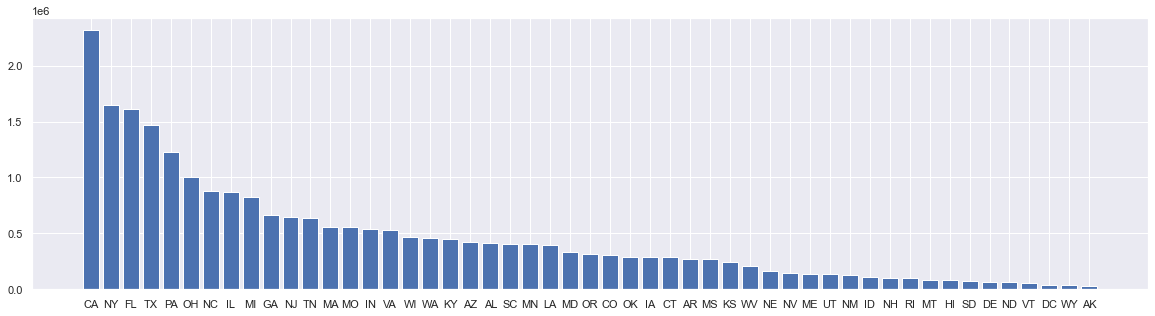

In [130]:
plt.rcParams["figure.figsize"] = (20,5)
x = tot_meds_per_state_sorted['state'].values
height  = tot_meds_per_state_sorted['total_num_medications'].values
plt.bar(x, height)
plt.show()

In [167]:
query = """ SELECT * FROM (SELECT nppes_provider_state as state, 
                                                  generic_name as medication_perscribed,
                                                  COUNT(generic_name) as num_perscribed,
                                                   ROW_NUMBER() OVER (PARTITION BY nppes_provider_state 
                                                                                              ORDER BY COUNT(generic_name) DESC) as rank 
                                                   FROM bigquery-public-data.medicare.part_d_prescriber_2014
                                                   WHERE (nppes_provider_state != 'AA' AND 
                                                                    nppes_provider_state != 'AE' AND 
                                                                    nppes_provider_state != 'AS' AND
                                                                    nppes_provider_state != 'AP' AND
                                                                    nppes_provider_state != 'GU' AND
                                                                    nppes_provider_state != 'MP' AND
                                                                    nppes_provider_state != 'PR' AND
                                                                    nppes_provider_state != 'VI' AND
                                                                    nppes_provider_state != 'XX' AND
                                                                    nppes_provider_state != 'ZZ')
                                                   GROUP BY 1, 2
                                                   ORDER BY 1, 3 DESC) as ranks
                   WHERE rank = 1;
              """

In [170]:
query_job = client.query(query)
most_common_perscription = query_job.to_dataframe()
print(len(most_common_perscription))
most_common_perscription.value_counts().head()

51


state  medication_perscribed      num_perscribed  rank
AK     HYDROCODONE/ACETAMINOPHEN  678             1       1
PA     POTASSIUM CHLORIDE         18141           1       1
ND     POTASSIUM CHLORIDE         1018            1       1
NE     LEVOTHYROXINE SODIUM       2422            1       1
NH     LEVOTHYROXINE SODIUM       1745            1       1
dtype: int64

In [176]:
most_common_perscription

,state,medication_perscribed,num_perscribed,rank
0,AK,HYDROCODONE/ACETAMINOPHEN,678,1
1,AL,POTASSIUM CHLORIDE,6595,1
2,AR,POTASSIUM CHLORIDE,4218,1
3,AZ,HYDROCODONE/ACETAMINOPHEN,7136,1
4,CA,HYDROCODONE/ACETAMINOPHEN,40966,1
5,CO,HYDROCODONE/ACETAMINOPHEN,6082,1
6,CT,LEVOTHYROXINE SODIUM,4143,1
7,DC,LISINOPRIL,866,1
8,DE,LEVOTHYROXINE SODIUM,1004,1
9,FL,LEVOTHYROXINE SODIUM,21601,1


In [175]:
Counter(most_common_perscription['medication_perscribed'].values)

Counter({'HYDROCODONE/ACETAMINOPHEN': 22,
         'POTASSIUM CHLORIDE': 14,
         'LEVOTHYROXINE SODIUM': 13,
         'LISINOPRIL': 1,
         'ALBUTEROL SULFATE': 1})

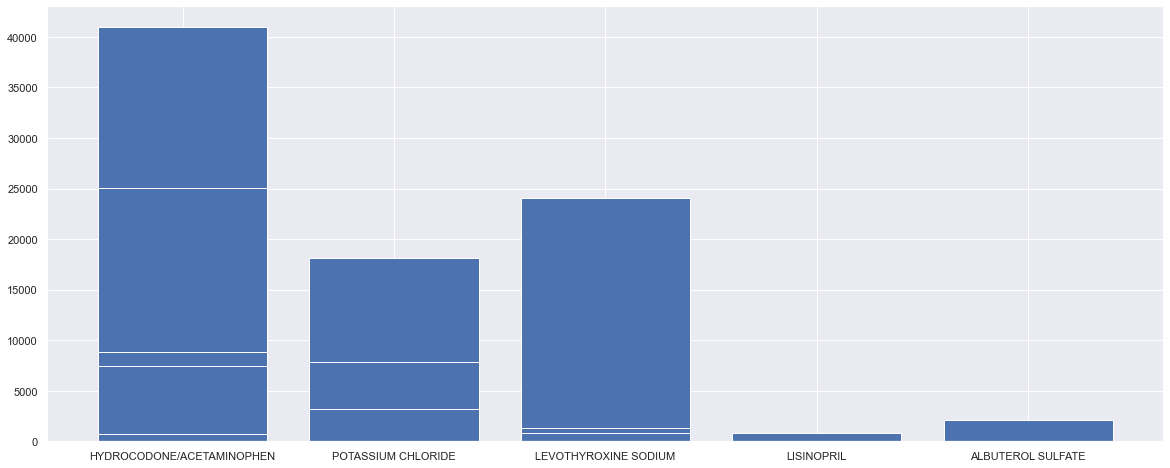

In [183]:
plt.rcParams["figure.figsize"] = (20,8)
label = most_common_perscription['state'].values
x = most_common_perscription['medication_perscribed'].values
height  = most_common_perscription['num_perscribed'].values
plt.bar(x, height)
plt.show()

<AxesSubplot:ylabel='medication_perscribed'>

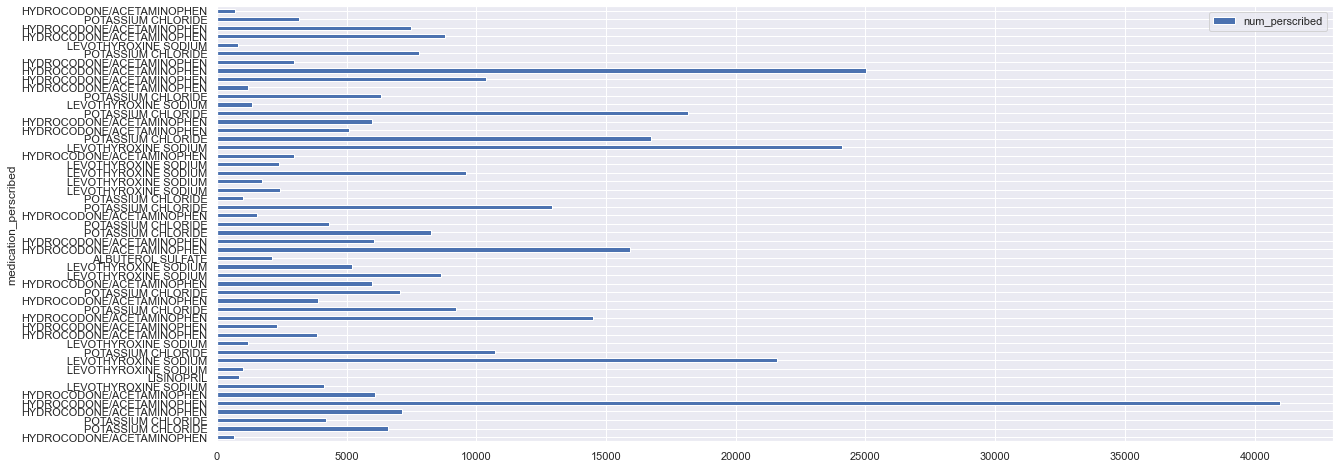

In [249]:
most_common_perscription.plot.barh(x='medication_perscribed', y='num_perscribed', rot=0)

In [253]:
most_common_perscription.groupby('medication_perscribed').state.values.plot.barh()

AttributeError: 'SeriesGroupBy' object has no attribute 'values'

In [252]:
most_common_perscription.num_perscribed.values

array([  678,  6595,  4218,  7136, 40966,  6082,  4143,   866,  1004,
       21601, 10732,  1184,  3864,  2319, 14493,  9219,  3913,  7040,
        5988,  8652,  5225,  2122, 15915,  6039,  8240,  4306,  1542,
       12929,  1018,  2422,  1745,  9587,  2395,  2979, 24089, 16721,
        5081,  5971, 18141,  1356,  6319,  1200, 10367, 25009,  2971,
        7805,   796,  8810,  7487,  3174,   683])

In [255]:
most_common_perscription.groupby('medication_perscribed').state.head()

0     AK
1     AL
2     AR
3     AZ
4     CA
5     CO
6     CT
7     DC
8     DE
9     FL
10    GA
11    HI
12    IA
15    IN
17    KY
19    MA
21    ME
Name: state, dtype: object

In [292]:
df_pivot = pd.pivot_table(
    most_common_perscription,
    values="num_perscribed",
    index="state",
    columns="medication_perscribed") #state, medication_perscribed

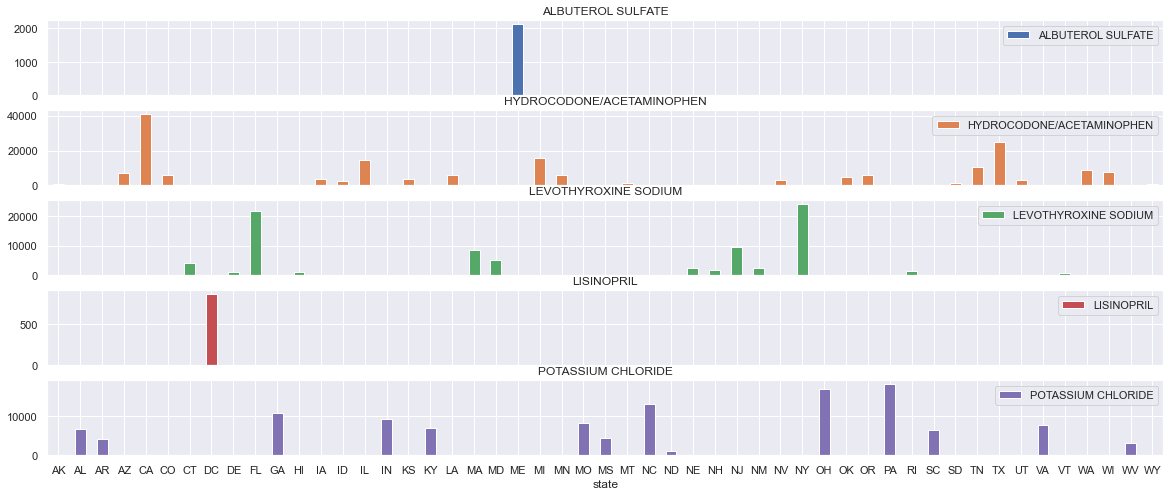

In [293]:
ax = df_pivot.plot(kind="bar", rot=0, subplots=True)
# Get a Matplotlib figure from the axes object for formatting purposes
# fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(25, 25)
# Change the axes labels
# ax.set_xlabel("State")
# ax.set_ylabel("Number of medications perscribed")

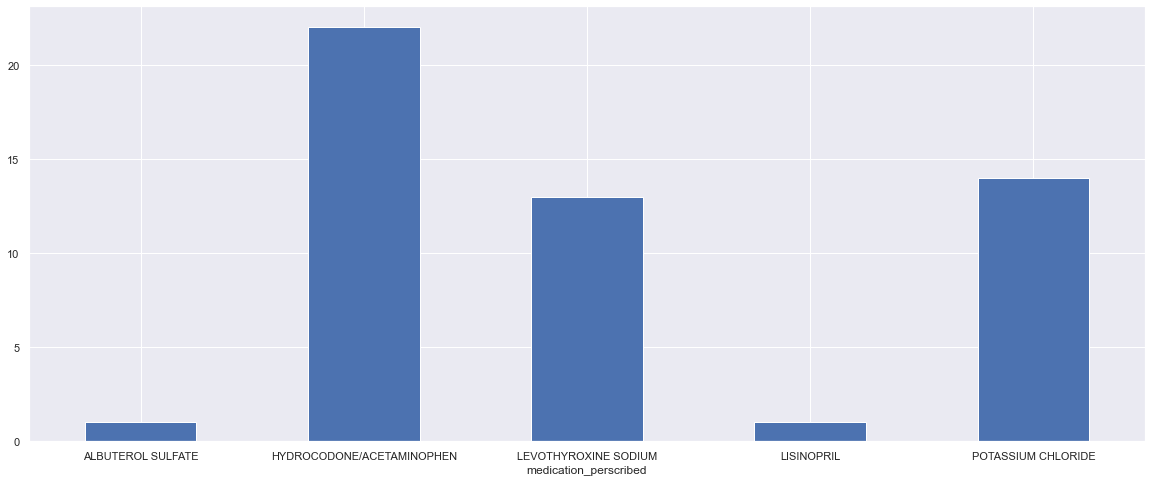

In [296]:
most_common_perscription.groupby('medication_perscribed')['state'].nunique().plot(kind='bar', rot=0)
plt.show()
# most_common_perscription.groupby('medication_perscribed').num_perscribed.value_counts().unstack().plot.barh()

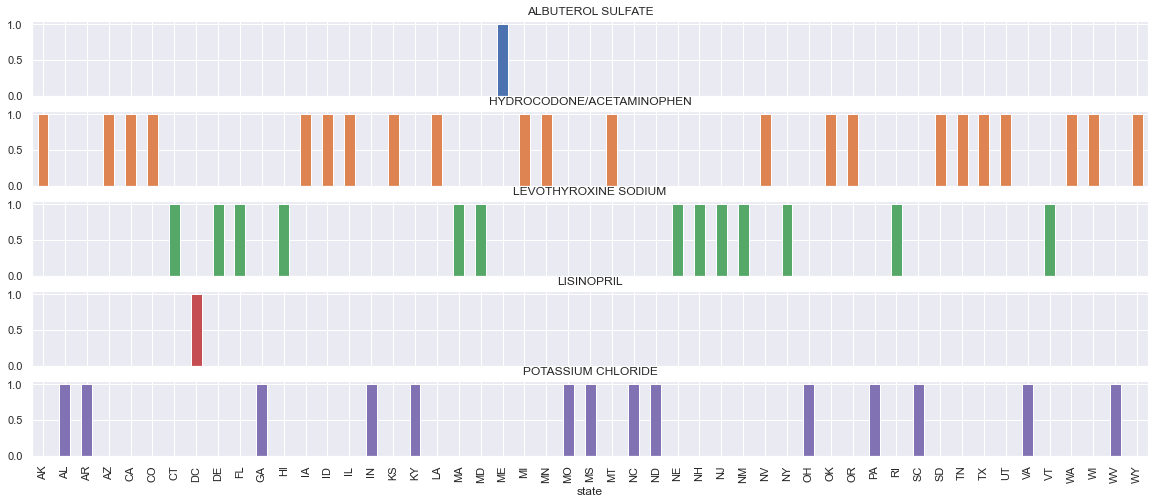

In [301]:
most_common_perscription.groupby(['state','medication_perscribed']).size().unstack().plot(kind='bar',stacked=True, 
                                                                                          subplots=True, legend=False)
plt.show()

In [310]:
import chart_studio.plotly as py
import plotly.graph_objects as go

In [316]:
def retrieve_token():
    with open('mapbox_token.json', 'r') as file:
            config = json.load(file)
            return config['token']

In [404]:
fig = px.choropleth(most_common_perscription,   
                                   locations="state",   
                                  color="medication_perscribed",   
                                  hover_name="state", 
                                  hover_data = {"medication_perscribed": True, "state" : False, "num_perscribed": True},
                                  locationmode = 'USA-states')
fig.update_layout(
    height=300,
    margin={'r':0,'t':40,'l':0,'b':20},
    title_text = 'Most commonly perscribed medication by state (US, 2014)', # Create a Title
    geo_scope='world', 
)
fig.update_geos(projection_type="natural earth")

fig.update_layout(
    title=dict(font=dict(family="Courier", size=20, color='black')),
    legend=dict(
        x=1,
        y=0.5,
        title=None,
        traceorder="reversed",
        font=dict(
            family="Courier",
            size=16,
            color="black"
        ),
        bgcolor="LightSteelBlue",
        bordercolor="Black",
        borderwidth=2
    )
)

fig.show()  # Output the plot to the screen